In [15]:
#斷詞前
#假如同一個人在當天的閒聊留言很多次（不考慮留言有沒有重複，ex：每個留言都是“爽”），如果他的留言數量大於所有留言數量的1/100，就把多餘的留言刪掉
#假設留言内容在一個列表中，每个元素包含留言内容和留言id
comments = [
    {"content": "這篇文章真是太爽了！", "author": "user1"},
    {"content": "爽爽爽！", "author": "user2"},
    {"content": "爽！", "author": "user3"},
    {"content": "我也覺得很爽。", "author": "user1"},
    {"content": "好爽啊！", "author": "user1"},
    {"content": "爽！", "author": "user3"},
    {"content": "爽爽爽！", "author": "user2"},
    {"content": "爽爽爽！", "author": "user1"},
    {"content": "爽爽爽！", "author": "user2"},
    {"content": "爽爽爽！", "author": "user2"},
    {"content": "爽爽爽！", "author": "user2"}
    # ... 其他留言
]

# 計算所有留言的数量
total_comments = len(comments)
print(total_comments)

# 計算 threshold（ex:所有留言數量的 1/100）
if (total_comments > 100):
  threshold = total_comments // 100
else:
  threshold = 2 #測試留言未超過100，先隨便設
# print(threshold)

# 過濾來自同一人過多的留言
author_comment_count = {}
filtered_comments = []

for comment in comments:
    author = comment["author"]

    # 計算每個id的留言數量
    if author not in author_comment_count:
        author_comment_count[author] = 1
    else:
        author_comment_count[author] += 1

    # 如果留言數量未超過 threshold，則將同一id的留言添加到 filtered_comments 中
    if author_comment_count[author] <= threshold:
        filtered_comments.append(comment)

# 輸出過濾後的留言
for comment in filtered_comments:
    print(f"作者 '{comment['author']}' 的留言：'{comment['content']}'")

11
作者 'user1' 的留言：'這篇文章真是太爽了！'
作者 'user2' 的留言：'爽爽爽！'
作者 'user3' 的留言：'爽！'
作者 'user1' 的留言：'我也覺得很爽。'
作者 'user3' 的留言：'爽！'
作者 'user2' 的留言：'爽爽爽！'


In [ ]:
#同樣的人留「完全相同」的留言只取第一個（一次）
#不同人相同留言可以留下來

In [8]:
#斷詞前
#假如同一個人在當天的閒聊留言很多次（不考慮留言有沒有重複，ex：每個留言都是“爽”），如果他的留言數量大於所有留言數量的1/100，就把多餘的留言刪掉
#假設留言内容在一個列表中，每个元素包含留言内容和留言id
comments = [
    {"content": "這篇文章真是太爽了！", "author": "user1"},
    {"content": "爽爽爽！", "author": "user2"},
    {"content": "爽！", "author": "user3"},
    {"content": "我也覺得很爽。", "author": "user1"},
    {"content": "好爽啊！", "author": "user1"},
    {"content": "爽！", "author": "user4"},
    {"content": "爽爽爽！", "author": "user2"},
    {"content": "爽爽爽！", "author": "user1"},
    {"content": "爽爽爽！", "author": "user2"},
    {"content": "爽爽爽！", "author": "user2"}
    # ... 其他留言
]

# 計算所有留言的数量
total_comments = len(comments)
print(total_comments)

# 計算 threshold（ex:所有留言數量的 1/10）
if (total_comments >=10):
  threshold = total_comments // 10
else:
  threshold = 2 #測試留言未超過10，先隨便設
# print(threshold)

# 過濾來自同一人過多的留言
author_comment_count = {}
filtered_comments = []

for comment in comments:
    author = comment["author"]

    # 計算每個id的留言數量
    if author not in author_comment_count:
        author_comment_count[author] = 1
    else:
        author_comment_count[author] += 1

    # 如果留言數量未超過 threshold，則將同一id的留言添加到 filtered_comments 中
    if author_comment_count[author] <= threshold:
        filtered_comments.append(comment)

# 輸出過濾後的留言
for comment in filtered_comments:
    print(f"作者 '{comment['author']}' 的留言：'{comment['content']}'")

10
作者 'user1' 的留言：'這篇文章真是太爽了！'
作者 'user2' 的留言：'爽爽爽！'
作者 'user3' 的留言：'爽！'
作者 'user4' 的留言：'爽！'


In [ ]:
#斷詞後
#假如同一個詞在當天的留言區出現很多次（不考慮是不是同一個作者留的，一個人留太多次的問題已經在上一個步驟解決）
from collections import Counter

# 假設已經進行了斷詞，得到了一個詞列表(不確定嚴鄰那裡實際上是長怎樣)
words = ["氣死", "氣死", "開心", "難過", "氣死", "開心", "開心","爽","爽","爽","爽","爽","爽","無聊"]

# 使用Counter統計詞頻
word_freq = Counter(words)

# 設定一個限制次數，比如說只允許出現2次
limit = 1

# 過濾掉詞頻超過限制次數的詞語
filtered_words = [word for word, freq in word_freq.items() if freq <= limit]

print("過濾後的詞語:", filtered_words)


In [1]:
#斷詞後
#假如同一個詞在當天的留言區出現很多次（不考慮是不是同一個作者留的，一個人留太多次的問題已經在上一個步驟解決）
import math

def calculate_weight(word_count):
    # 假設 word_count 是詞語在文本中的出現次數
    # 使用對數函數來調整權重，這裡加 1 是為了避免 log(0) 的情況
    weight = math.log(word_count + 1)  # 可以根據需要調整底數
    return weight

# 假設有個字典 word_counts 存儲了各個詞語的出現次數#得到了一個詞列表(不確定嚴鄰那裡實際上是長怎樣)
word_counts = {
    "喜歡": 20,
    "開心": 15,
    "難過": 10,
    "愉快": 5,
    # 其他詞語及其出現次數
}

# 獲取最大出現次數
#max_count = max(word_counts.values())

# 計算每個詞語的權重
word_weights = {}
for word, count in word_counts.items():
    weight = calculate_weight(count)
    word_weights[word] = weight

# 輸出詞語及其權重
for word, weight in word_weights.items():
    print(f"詞語 '{word}' 的權重: {weight}")

詞語 '喜歡' 的權重: 3.044522437723423
詞語 '開心' 的權重: 2.772588722239781
詞語 '難過' 的權重: 2.3978952727983707
詞語 '愉快' 的權重: 1.791759469228055


--2023-11-28 08:28:44--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 173.194.74.138, 173.194.74.102, 173.194.74.101, ...
Connecting to drive.google.com (drive.google.com)|173.194.74.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/4mo7t4meg00ka100f1cik5325b0k6tur/1701160125000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=12ec7d6e-d85d-44c6-96dc-409fcf8c4da4 [following]
--2023-11-28 08:28:45--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/4mo7t4meg00ka100f1cik5325b0k6tur/1701160125000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=12ec7d6e-d85d-44c6-96dc-409fcf8c4da4
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 172.217.212.132, 2607:f8b0:4001:c03::84
Connecting to doc-0

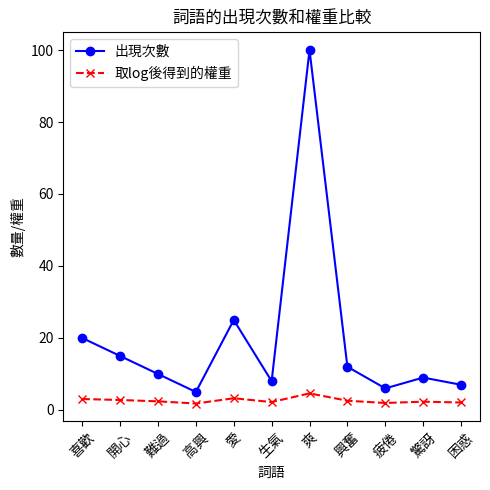

In [9]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.font_manager import fontManager
import math

# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

def calculate_weight(word_count):
    # 假設 word_count 是詞語在文本中的出現次數
    # 使用對數函數來調整權重，這裡加 1 是為了避免 log(0) 的情況
    weight = math.log(word_count + 1)  # 可以根據需要調整底數
    return weight


word_counts = {
    "喜歡": 20,
    "開心": 15,
    "難過": 10,
    "高興": 5,
    "愛": 25,
    "生氣": 8,
    "爽": 100,
    "興奮": 12,
    "疲倦": 6,
    "驚訝": 9,
    "困惑": 7,
    # 其他詞語及其出現次數
}

# 獲取最大出現次數
#max_count = max(word_counts.values())

# 計算每個詞語的權重
word_weights = {}
for word, count in word_counts.items():
    weight = calculate_weight(count)
    word_weights[word] = weight

# 輸出詞語及其權重
for word, weight in word_weights.items():
    print(f"詞語 '{word}' 的權重: {weight}")

# 將詞語和相應的權重分開存放
words = list(word_counts.keys())
counts = list(word_counts.values())
weights = list(word_weights.values())

plt.figure(figsize=(5, 5))

# 繪製詞語出現次數的折線圖
plt.plot(words, counts, marker='o', linestyle='-', color='blue', label='出現次數')

# 繪製詞語權重的折線圖
plt.plot(words, weights, marker='x', linestyle='--', color='red', label='取log後得到的權重')

plt.xlabel('詞語')
plt.ylabel('數量/權重')
plt.title('詞語的出現次數和權重比較')
plt.legend()

plt.xticks(rotation=45)  # 旋轉 x 軸標籤

plt.tight_layout()
plt.show()